!pip install tensorflow

In [1]:
import warnings
warnings.filterwarnings('default')
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.optimizers import SGD

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Q1 - Softmax MNIST Classification

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model_weights = []

def get_model_weights(epoch, logs):
    if epoch+1 in [20,200]:
        model_weights.append(model.get_weights()[0])

callback = tf.keras.callbacks.LambdaCallback(on_epoch_end = get_model_weights)

In [5]:
history_output = model.fit(x_train,
                           y_train,
                           epochs=200,
                           batch_size=128,
                           validation_data=(x_test, y_test),
                           callbacks=[callback])

Epoch 1/200


I0000 00:00:1727208429.775823     105 service.cc:145] XLA service 0x7de598005480 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727208429.775875     105 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1727208429.775879     105 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 96/469 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1309 - loss: 2.3369

I0000 00:00:1727208430.535320     105 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1948 - loss: 2.2394 - val_accuracy: 0.4633 - val_loss: 1.9061
Epoch 2/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5220 - loss: 1.8325 - val_accuracy: 0.6535 - val_loss: 1.6003
Epoch 3/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6724 - loss: 1.5571 - val_accuracy: 0.7219 - val_loss: 1.3833
Epoch 4/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7300 - loss: 1.3589 - val_accuracy: 0.7620 - val_loss: 1.2262
Epoch 5/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7591 - loss: 1.2140 - val_accuracy: 0.7860 - val_loss: 1.1094
Epoch 6/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7824 - loss: 1.1060 - val_accuracy: 0.8038 - val_loss: 1.0198
Epoch 7/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7938 - loss: 1.0242 - val_accuracy: 0.8141 - val_loss: 0.9493
Epoch 8/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8097 - loss: 0.9533 - val_accuracy: 0.8244

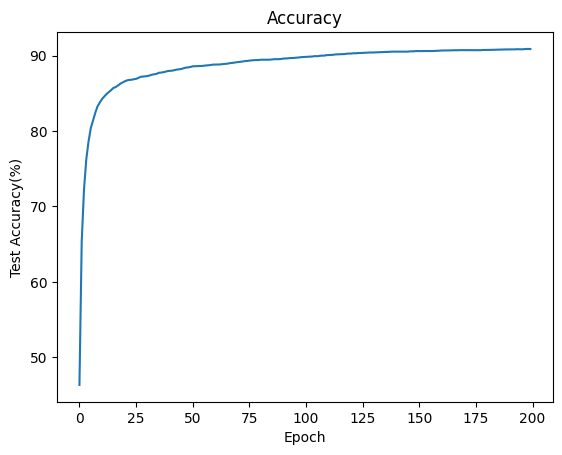

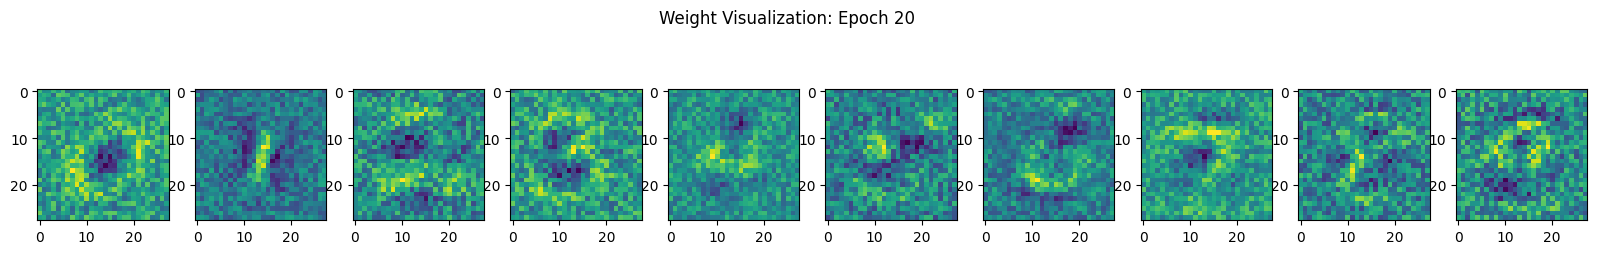

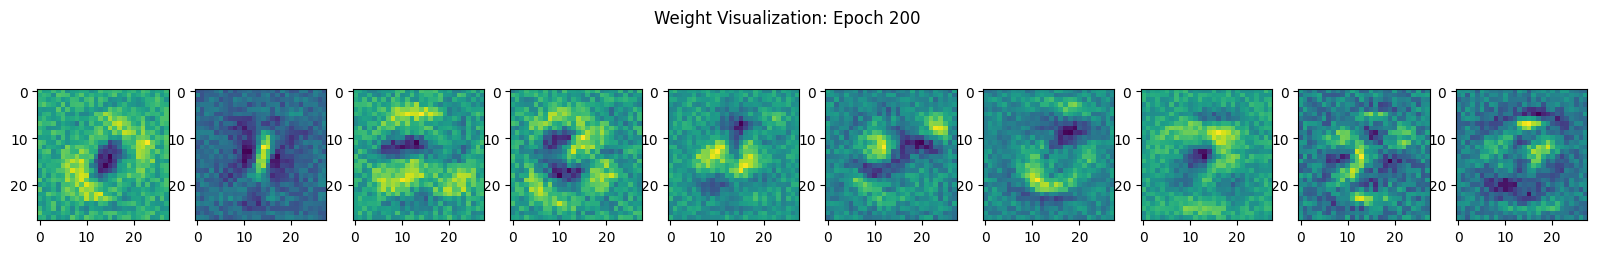

In [73]:
plt.plot([i*100 for i in history_output.history['val_accuracy']])
plt.title('Accuracy')
plt.ylabel('Test Accuracy(%)')
plt.xlabel('Epoch')

plt.figure(figsize=(20, 3))
plt.suptitle('Weight Visualization: Epoch 20')
for i in range(10):
    ax = plt.subplot(1, 10, i + 1)
    ax.imshow(model_weights[0][:, i].reshape(28, 28))

plt.figure(figsize=(20, 3))
plt.suptitle('Weight Visualization: Epoch 200')
for i in range(10):
    ax = plt.subplot(1, 10, i + 1)
    ax.imshow(model_weights[1][:, i].reshape(28, 28))
plt.show()

# Q2 - Autoencoders

### Naive AE 

In [7]:
autoencoder_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='sigmoid', name='bottleneck_layer'),
    tf.keras.layers.Dense(784, activation='sigmoid')
])

autoencoder_model.compile(optimizer=SGD(learning_rate=1.0), loss='mse')
autoencoder_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck_layer (Dense)        │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 784)            │        79,184 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 157,684 (615.95 KB)

 Trainable params: 157,684 (615.95 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history_autoencoder_model = autoencoder_model.fit(x_train,
                                                  x_train.reshape(x_train.shape[0], 784),
                                                  epochs=200,
                                                  batch_size=128,
                                                  validation_data=(x_test, x_test.reshape(x_test.shape[0], 784)))

Epoch 1/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1426 - val_loss: 0.0723
Epoch 2/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0710 - val_loss: 0.0694
Epoch 3/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0688 - val_loss: 0.0686
Epoch 4/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0685 - val_loss: 0.0682
Epoch 5/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0679 - val_loss: 0.0680
Epoch 6/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0678 - val_loss: 0.0677
Epoch 7/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0674 - val_loss: 0.0674
Epoch 8/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0670 - val_loss: 0.0670
Epoch 9/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0666 - val_loss: 0.0664
Epoch 10/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0662 - val_loss: 0.0658
Epoch 11/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0655 - val_loss: 0.0651
Epoch 12/200
469/469 ━━━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


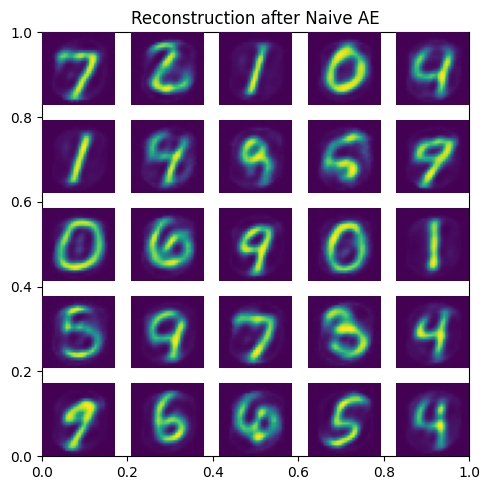

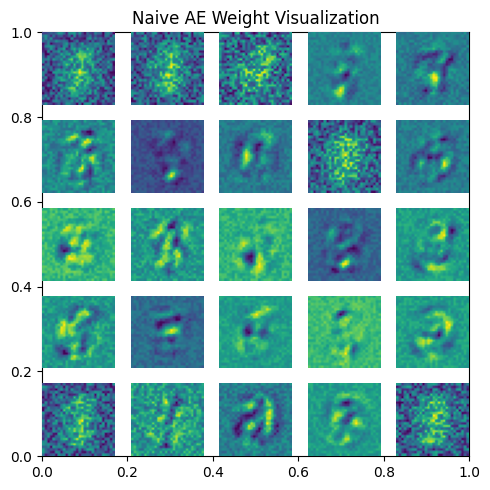

In [9]:
naive_ae_reconstructed_imgs = autoencoder_model.predict(x_test[:25].reshape(25, 28, 28))
naive_ae_weights = autoencoder_model.get_weights()[0][:, :25] 

fig = plt.figure(figsize=(5, 5))
plt.title('Reconstruction after Naive AE')
for i in range(25):
    ax = fig.add_subplot(5, 5, i + 1)
    ax.imshow(naive_ae_reconstructed_imgs[i].reshape(28, 28))
    ax.axis('off')
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(5, 5))
plt.title('Naive AE Weight Visualization')
for i in range(25):
    ax = fig.add_subplot(5, 5, i + 1)
    ax.imshow(naive_ae_weights[:,i].reshape(28, 28))
    ax.axis('off')
plt.tight_layout()
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


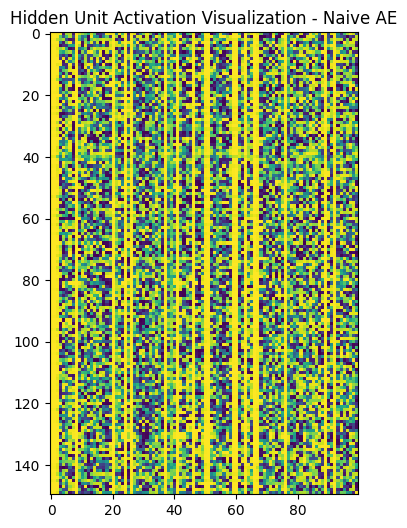

In [10]:
hidden_unit_activation_model = tf.keras.models.Model(inputs=autoencoder_model.inputs, 
                                                     outputs=autoencoder_model.layers[1].output)
hidden_unit_activation = hidden_unit_activation_model.predict(x_test[:150])

fig = plt.figure(figsize=(5, 6))
plt.title('Hidden Unit Activation Visualization - Naive AE')
plt.imshow(hidden_unit_activation)
plt.show()

In [11]:
autoencoder_model.get_layer('bottleneck_layer').trainable = False
output = tf.keras.layers.Dense(units=10, activation='softmax')(autoencoder_model.get_layer('bottleneck_layer').output)

autoencoder_model = tf.keras.models.Model(inputs=autoencoder_model.inputs, outputs=output)
autoencoder_model.compile(optimizer=SGD(learning_rate=1.0), loss='categorical_crossentropy', metrics=['accuracy'])
autoencoder_model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck_layer (Dense)        │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 1,010 (3.95 KB)

 Non-trainable params: 78,500 (306.64 KB)

In [12]:
history_autoencoder_model = autoencoder_model.fit(x_train,
                                                  y_train,
                                                  epochs=200,
                                                  batch_size=128,
                                                  validation_data=(x_test, y_test))

Epoch 1/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6924 - loss: 1.5527 - val_accuracy: 0.8484 - val_loss: 0.4681
Epoch 2/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8710 - loss: 0.4242 - val_accuracy: 0.8921 - val_loss: 0.3518
Epoch 3/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8826 - loss: 0.3869 - val_accuracy: 0.8971 - val_loss: 0.3416
Epoch 4/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8844 - loss: 0.3777 - val_accuracy: 0.8934 - val_loss: 0.3602
Epoch 5/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8903 - loss: 0.3635 - val_accuracy: 0.8401 - val_loss: 0.5085
Epoch 6/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8904 - loss: 0.3608 - val_accuracy: 0.9017 - val_loss: 0.3309
Epoch 7/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8949 - loss: 0.3546 - val_accuracy: 0.8813 - val_loss: 0.3832
Epoch 8/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8921 - loss: 0.3556 - val_accu

### Sparse AE

Very poor results with L1 and L2 regularization. Almost the same as naive AE. Hence, applying KL divergence.

In [13]:
def kl_div_regularization(unit_activations):
    lambd_a = 0.5
    alpha = 0.2
    alpha_hat = tf.keras.backend.mean(unit_activations)
    kl_div = alpha*tf.keras.backend.log(alpha/alpha_hat) + (1-alpha)*tf.keras.backend.log((1-alpha)/(1-alpha_hat))
    kl_div_reg = lambd_a*tf.keras.backend.sum(kl_div)
    return kl_div_reg

In [14]:
from keras import regularizers

sparse_autoencoder_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu', 
                          name='bottleneck_layer', 
                          activity_regularizer=kl_div_regularization
                         ),
    tf.keras.layers.Dense(784, activation='relu')
])

sparse_autoencoder_model.compile(optimizer=SGD(learning_rate=1.0), loss='mse')
sparse_autoencoder_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck_layer (Dense)        │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │        79,184 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 157,684 (615.95 KB)

 Trainable params: 157,684 (615.95 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history_sparse_autoencoder_model = sparse_autoencoder_model.fit(x_train,
                                                                x_train.reshape(x_train.shape[0], 784),
                                                                epochs=500,
                                                                batch_size=128,
                                                                validation_data=(x_test, x_test.reshape(x_test.shape[0], 784)))

Epoch 1/500
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0745 - val_loss: 0.0490
Epoch 2/500
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0450 - val_loss: 0.0372
Epoch 3/500
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0355 - val_loss: 0.0318
Epoch 4/500
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0306 - val_loss: 0.0280
Epoch 5/500
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0272 - val_loss: 0.0256
Epoch 6/500
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0250 - val_loss: 0.0239
Epoch 7/500
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0233 - val_loss: 0.0225
Epoch 8/500
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0221 - val_loss: 0.0214
Epoch 9/500
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0210 - val_loss: 0.0206
Epoch 10/500
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0202 - val_loss: 0.0198
Epoch 11/500
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0195 - val_loss: 0.0192
Epoch 12/500
469/469 ━━━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


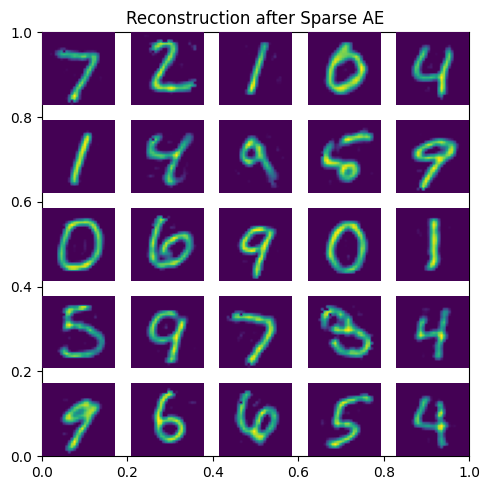

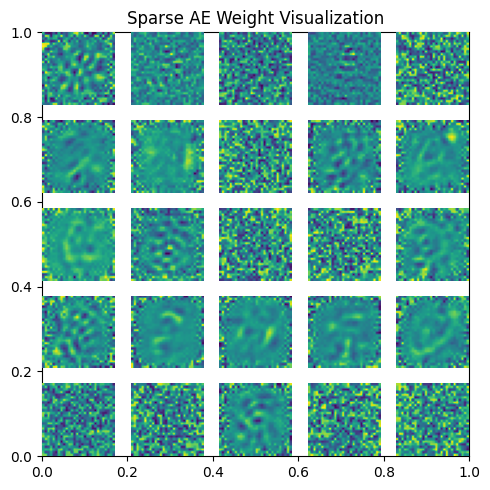

In [16]:
sparse_ae_reconstructed_imgs = sparse_autoencoder_model.predict(x_test[:25].reshape(25, 28, 28))
sparse_ae_weights = sparse_autoencoder_model.get_weights()[0][:, :25] 

fig = plt.figure(figsize=(5, 5))
plt.title('Reconstruction after Sparse AE')
for i in range(25):
    ax = fig.add_subplot(5, 5, i + 1)
    ax.imshow(sparse_ae_reconstructed_imgs[i].reshape(28, 28))
    ax.axis('off')
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(5, 5))
plt.title('Sparse AE Weight Visualization')
for i in range(25):
    ax = fig.add_subplot(5, 5, i + 1)
    ax.imshow(sparse_ae_weights[:,i].reshape(28, 28))
    ax.axis('off')
plt.tight_layout()
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


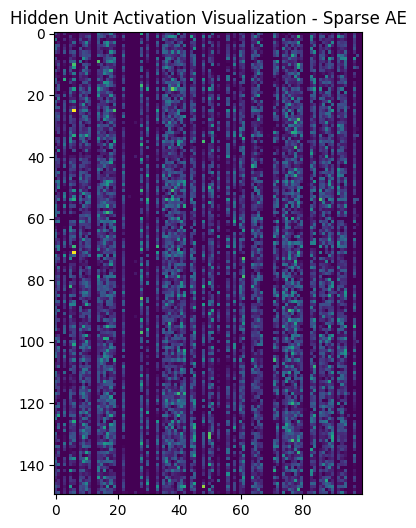

In [17]:
sparse_hidden_unit_activation_model = tf.keras.models.Model(inputs=sparse_autoencoder_model.inputs, 
                                                     outputs=sparse_autoencoder_model.layers[1].output)
sparse_hidden_unit_activation = sparse_hidden_unit_activation_model.predict(x_test[:150])

fig = plt.figure(figsize=(4, 6))
plt.title('Hidden Unit Activation Visualization - Sparse AE')
plt.imshow(sparse_hidden_unit_activation)
plt.show()

In [18]:
sparse_autoencoder_model.get_layer('bottleneck_layer').trainable = False
output_sparse = tf.keras.layers.Dense(units=10, activation='softmax')(sparse_autoencoder_model.get_layer('bottleneck_layer').output)

sparse_autoencoder_model = tf.keras.models.Model(inputs=sparse_autoencoder_model.inputs, 
                                                 outputs=output_sparse)
sparse_autoencoder_model.compile(optimizer=SGD(learning_rate=1.0), loss='categorical_crossentropy', metrics=['accuracy'])
sparse_autoencoder_model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck_layer (Dense)        │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 1,010 (3.95 KB)

 Non-trainable params: 78,500 (306.64 KB)

In [19]:
history_sparse_autoencoder_model = sparse_autoencoder_model.fit(x_train,
                                                                y_train,
                                                                epochs=200,
                                                                batch_size=128,
                                                                validation_data=(x_test, y_test))

Epoch 1/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7733 - loss: 0.9395 - val_accuracy: 0.8988 - val_loss: 0.3989
Epoch 2/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8907 - loss: 0.4050 - val_accuracy: 0.9013 - val_loss: 0.3508
Epoch 3/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8981 - loss: 0.3653 - val_accuracy: 0.9067 - val_loss: 0.3302
Epoch 4/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9020 - loss: 0.3437 - val_accuracy: 0.9101 - val_loss: 0.3212
Epoch 5/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9033 - loss: 0.3385 - val_accuracy: 0.9133 - val_loss: 0.3108
Epoch 6/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9072 - loss: 0.3274 - val_accuracy: 0.9148 - val_loss: 0.3070
Epoch 7/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9062 - loss: 0.3246 - val_accuracy: 0.9150 - val_loss: 0.3036
Epoch 8/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9062 - loss: 0.3234 - val_accu

Text(0.5, 0, 'Epoch')

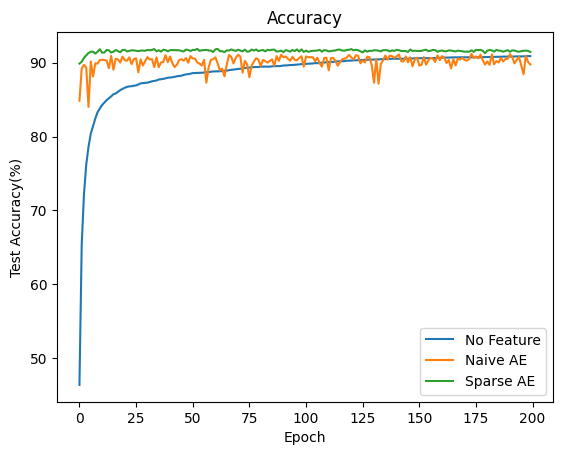

In [74]:
plt.plot([i*100 for i in history_output.history['val_accuracy']], label='No Feature')
plt.plot([i*100 for i in history_autoencoder_model.history['val_accuracy']], label='Naive AE')
plt.plot([i*100 for i in history_sparse_autoencoder_model.history['val_accuracy']], label='Sparse AE')
plt.legend()
plt.title('Accuracy')
plt.ylabel('Test Accuracy(%)')
plt.xlabel('Epoch')

# Q3 - Shallow NN

In [58]:
shallow_nn = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])

optimizer = SGD(learning_rate=0.5)
shallow_nn.compile(optimizer=optimizer,
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])
shallow_nn.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
history_shallow_nn = shallow_nn.fit(x_train,
                                    y_train,
                                    epochs=200,
                                    batch_size=128,
                                    validation_data=(x_test, y_test))

Epoch 1/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7593 - loss: 0.8417 - val_accuracy: 0.9132 - val_loss: 0.3011
Epoch 2/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9135 - loss: 0.2961 - val_accuracy: 0.9281 - val_loss: 0.2487
Epoch 3/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9291 - loss: 0.2434 - val_accuracy: 0.9377 - val_loss: 0.2090
Epoch 4/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9402 - loss: 0.2057 - val_accuracy: 0.9475 - val_loss: 0.1805
Epoch 5/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9485 - loss: 0.1811 - val_accuracy: 0.9524 - val_loss: 0.1637
Epoch 6/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9550 - loss: 0.1565 - val_accuracy: 0.9553 - val_loss: 0.1502
Epoch 7/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9609 - loss: 0.1383 - val_accuracy: 0.9585 - val_loss: 0.1376
Epoch 8/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9641 - loss: 0.1297 - val_accu

Text(0.5, 0, 'Epoch')

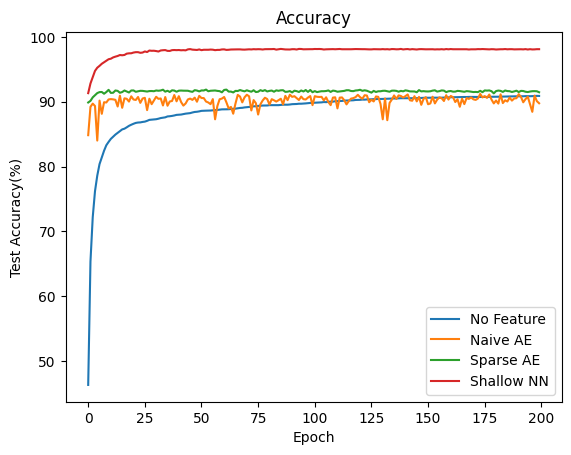

In [75]:
plt.plot([i*100 for i in history_output.history['val_accuracy']], label='No Feature')
plt.plot([i*100 for i in history_autoencoder_model.history['val_accuracy']], label='Naive AE')
plt.plot([i*100 for i in history_sparse_autoencoder_model.history['val_accuracy']], label='Sparse AE')
plt.plot([i*100 for i in history_shallow_nn.history['val_accuracy']], label='Shallow NN')
plt.legend()
plt.title('Accuracy')
plt.ylabel('Test Accuracy(%)')
plt.xlabel('Epoch')

# Q4

### Part 1

In [41]:
autoencoder_model.get_layer('bottleneck_layer').trainable = True
output_bp = tf.keras.layers.Dense(units=10, activation='softmax')(autoencoder_model.get_layer('bottleneck_layer').output)

naive_ae_bp_model = tf.keras.models.Model(inputs=autoencoder_model.inputs, 
                                                 outputs=output_bp)
naive_ae_bp_model.compile(optimizer=SGD(learning_rate=1.0), loss='categorical_crossentropy', metrics=['accuracy'])
naive_ae_bp_model.summary()

Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck_layer (Dense)        │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
history_naive_ae_bp_model = naive_ae_bp_model.fit(x_train, 
                                                  y_train, 
                                                  epochs=200, 
                                                  batch_size=128, 
                                                  validation_data=(x_test, y_test))

Epoch 1/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7849 - loss: 0.9283 - val_accuracy: 0.9304 - val_loss: 0.2436
Epoch 2/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9336 - loss: 0.2250 - val_accuracy: 0.9405 - val_loss: 0.2019
Epoch 3/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9508 - loss: 0.1693 - val_accuracy: 0.9574 - val_loss: 0.1474
Epoch 4/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9591 - loss: 0.1410 - val_accuracy: 0.9614 - val_loss: 0.1290
Epoch 5/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9674 - loss: 0.1157 - val_accuracy: 0.9603 - val_loss: 0.1285
Epoch 6/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9705 - loss: 0.1044 - val_accuracy: 0.9674 - val_loss: 0.1090
Epoch 7/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9743 - loss: 0.0880 - val_accuracy: 0.9694 - val_loss: 0.0974
Epoch 8/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9751 - loss: 0.0841 - val_accu

In [51]:
sparse_autoencoder_model.get_layer('bottleneck_layer').trainable = True
output_sparse_bp = tf.keras.layers.Dense(units=10, activation='softmax')(sparse_autoencoder_model.get_layer('bottleneck_layer').output)

sparse_ae_bp_model = tf.keras.models.Model(inputs=sparse_autoencoder_model.inputs, 
                                                 outputs=output_sparse_bp)
sparse_ae_bp_model.compile(optimizer=SGD(learning_rate=1.0), loss='categorical_crossentropy', metrics=['accuracy'])
sparse_ae_bp_model.summary()

Model: "functional_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck_layer (Dense)        │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
history_sparse_ae_bp_model = sparse_ae_bp_model.fit(x_train, 
                                                    y_train, 
                                                    epochs=200, 
                                                    batch_size=512, 
                                                    validation_data=(x_test, y_test))

Epoch 1/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9268 - loss: 0.2760 - val_accuracy: 0.9713 - val_loss: 0.0994
Epoch 2/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9966 - loss: 0.0304 - val_accuracy: 0.9728 - val_loss: 0.0932
Epoch 3/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9986 - loss: 0.0203 - val_accuracy: 0.9735 - val_loss: 0.0926
Epoch 4/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9996 - loss: 0.0150 - val_accuracy: 0.9734 - val_loss: 0.0924
Epoch 5/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9996 - loss: 0.0127 - val_accuracy: 0.9740 - val_loss: 0.0933
Epoch 6/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9998 - loss: 0.0107 - val_accuracy: 0.9741 - val_loss: 0.0939
Epoch 7/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9999 - loss: 0.0092 - val_accuracy: 0.9735 - val_loss: 0.0942
Epoch 8/200
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9998 - loss: 0.0081 - val_acc

Text(0.5, 0, 'Epoch')

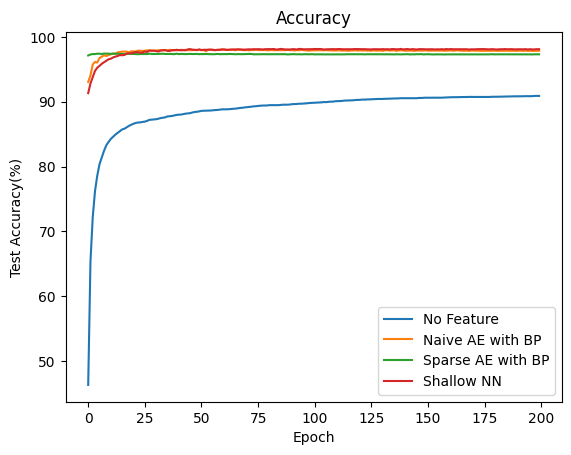

In [70]:
plt.plot([i*100 for i in history_output.history['val_accuracy']], label='No Feature')
plt.plot([i*100 for i in history_naive_ae_bp_model.history['val_accuracy']], label='Naive AE with BP')
plt.plot([i*100 for i in history_sparse_ae_bp_model.history['val_accuracy']], label='Sparse AE with BP')
plt.plot([i*100 for i in history_shallow_nn.history['val_accuracy']], label='Shallow NN')
plt.legend()
plt.title('Accuracy')
plt.ylabel('Test Accuracy(%)')
plt.xlabel('Epoch')

### Part 2

#### i) Activation: sigmoid, Initialization: random numbers generated from the normal distribution (μ = 0, σ = 0.01)

In [29]:
init_sigmoid_randomnormal = tf.random_normal_initializer(mean=0.0, stddev=0.05, seed=42)

sigmoid_randomnormal_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='sigmoid', kernel_initializer=init_sigmoid_randomnormal),
    tf.keras.layers.Dense(512, activation='sigmoid', kernel_initializer=init_sigmoid_randomnormal),
    tf.keras.layers.Dense(512, activation='sigmoid', kernel_initializer=init_sigmoid_randomnormal),
    tf.keras.layers.Dense(512, activation='sigmoid', kernel_initializer=init_sigmoid_randomnormal),
    tf.keras.layers.Dense(512, activation='sigmoid', kernel_initializer=init_sigmoid_randomnormal),
    tf.keras.layers.Dense(10, activation='softmax')
])

sigmoid_randomnormal_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
sigmoid_randomnormal_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,457,674 (5.56 MB)

 Trainable params: 1,457,674 (5.56 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_sigmoid_randomnormal_model = sigmoid_randomnormal_model.fit(x_train,
                                                                    y_train,
                                                                    epochs=50,
                                                                    batch_size=128,
                                                                    validation_data=(x_test, y_test))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1053 - loss: 2.3178 - val_accuracy: 0.1028 - val_loss: 2.3033
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1087 - loss: 2.3035 - val_accuracy: 0.1135 - val_loss: 2.3059
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1101 - loss: 2.3036 - val_accuracy: 0.1135 - val_loss: 2.3013
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1065 - loss: 2.3041 - val_accuracy: 0.0958 - val_loss: 2.3039
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1078 - loss: 2.3041 - val_accuracy: 0.1028 - val_loss: 2.3044
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1080 - loss: 2.3037 - val_accuracy: 0.0980 - val_loss: 2.3053
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1073 - loss: 2.3038 - val_accuracy: 0.1010 - val_loss: 2.3039
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1079 - loss: 2.3037 - val_accuracy: 0.

#### ii) Activation: sigmoid, Initialization: Xavier initializer

In [ ]:
sigmoid_xavier_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='sigmoid', kernel_initializer='glorot_normal'),
    tf.keras.layers.Dense(512, activation='sigmoid', kernel_initializer='glorot_normal'),
    tf.keras.layers.Dense(512, activation='sigmoid', kernel_initializer='glorot_normal'),
    tf.keras.layers.Dense(512, activation='sigmoid', kernel_initializer='glorot_normal'),
    tf.keras.layers.Dense(512, activation='sigmoid', kernel_initializer='glorot_normal'),
    tf.keras.layers.Dense(10, activation='softmax')
])

sigmoid_xavier_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
sigmoid_xavier_model.summary()

In [40]:
history_sigmoid_xavier_model = sigmoid_xavier_model.fit(x_train,
                                                        y_train,
                                                        epochs=50,
                                                        batch_size=128,
                                                        validation_data=(x_test, y_test))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1103 - loss: 2.3021 - val_accuracy: 0.1679 - val_loss: 2.3020
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1099 - loss: 2.3017 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1109 - loss: 2.3023 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1086 - loss: 2.3024 - val_accuracy: 0.1028 - val_loss: 2.3029
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1128 - loss: 2.3020 - val_accuracy: 0.1028 - val_loss: 2.3023
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1108 - loss: 2.3016 - val_accuracy: 0.1028 - val_loss: 2.2999
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1126 - loss: 2.3018 - val_accuracy: 0.0980 - val_loss: 2.3028
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1111 - loss: 2.3016 - val_accuracy: 0.

#### iii) Activation: ReLU, Initialization: random numbers generated from the normal distribution (μ = 0, σ = 0.01)

In [ ]:
init_relu_randomnormal = tf.random_normal_initializer(mean=0.0, stddev=0.01, seed=42)

relu_randomnormal_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu', kernel_initializer=init_relu_randomnormal),
    tf.keras.layers.Dense(512, activation='relu', kernel_initializer=init_relu_randomnormal),
    tf.keras.layers.Dense(512, activation='relu', kernel_initializer=init_relu_randomnormal),
    tf.keras.layers.Dense(512, activation='relu', kernel_initializer=init_relu_randomnormal),
    tf.keras.layers.Dense(512, activation='relu', kernel_initializer=init_relu_randomnormal),
    tf.keras.layers.Dense(10, activation='softmax')
])

relu_randomnormal_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
relu_randomnormal_model.summary()

In [34]:
history_relu_randomnormal_model = relu_randomnormal_model.fit(x_train,
                                                              y_train,
                                                              epochs=50,
                                                              batch_size=128,
                                                              validation_data=(x_test, y_test))

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1104 - loss: 2.3022 - val_accuracy: 0.1135 - val_loss: 2.3014
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1144 - loss: 2.3012 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1124 - loss: 2.3012 - val_accuracy: 0.1135 - val_loss: 2.3009
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1107 - loss: 2.3013 - val_accuracy: 0.1135 - val_loss: 2.3009
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1131 - loss: 2.3010 - val_accuracy: 0.1135 - val_loss: 2.3009
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1119 - loss: 2.3012 - val_accuracy: 0.1135 - val_loss: 2.3008
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1087 - loss: 2.3016 - val_accuracy: 0.1135 - val_loss: 2.3008
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1133 - loss: 2.3008 - val_accuracy: 0.1135 - val_

#### iv) Activation: ReLU, Initialization: Xavier initializer

In [35]:
relu_xavier_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu', kernel_initializer='glorot_normal'),
    tf.keras.layers.Dense(512, activation='relu', kernel_initializer='glorot_normal'),
    tf.keras.layers.Dense(512, activation='relu', kernel_initializer='glorot_normal'),
    tf.keras.layers.Dense(512, activation='relu', kernel_initializer='glorot_normal'),
    tf.keras.layers.Dense(512, activation='relu', kernel_initializer='glorot_normal'),
    tf.keras.layers.Dense(10, activation='softmax')
])

relu_xavier_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
relu_xavier_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,457,674 (5.56 MB)

 Trainable params: 1,457,674 (5.56 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
history_relu_xavier_model = relu_xavier_model.fit(x_train,
                                                  y_train,
                                                  epochs=50,
                                                  batch_size=128,
                                                  validation_data=(x_test, y_test))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4499 - loss: 1.9415 - val_accuracy: 0.8601 - val_loss: 0.5005
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8727 - loss: 0.4474 - val_accuracy: 0.9033 - val_loss: 0.3330
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9089 - loss: 0.3120 - val_accuracy: 0.9250 - val_loss: 0.2618
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9238 - loss: 0.2614 - val_accuracy: 0.9306 - val_loss: 0.2367
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9326 - loss: 0.2312 - val_accuracy: 0.9396 - val_loss: 0.2116
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9400 - loss: 0.2058 - val_accuracy: 0.9443 - val_loss: 0.1909
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9476 - loss: 0.1809 - val_accuracy: 0.9484 - val_loss: 0.1771
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9498 - loss: 0.1696 - val_accuracy: 0.

#### v) Activation: ReLU, Initialization: Kaiming He’s initializer

In [37]:
relu_he_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(10, activation='softmax')
])

relu_he_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
relu_he_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,457,674 (5.56 MB)

 Trainable params: 1,457,674 (5.56 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
history_relu_he_model = relu_he_model.fit(x_train,
                                          y_train,
                                          epochs=50,
                                          batch_size=128,
                                          validation_data=(x_test, y_test))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6724 - loss: 1.1909 - val_accuracy: 0.9095 - val_loss: 0.3033
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9164 - loss: 0.2861 - val_accuracy: 0.9254 - val_loss: 0.2540
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9349 - loss: 0.2227 - val_accuracy: 0.9418 - val_loss: 0.1864
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9471 - loss: 0.1801 - val_accuracy: 0.9511 - val_loss: 0.1655
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9532 - loss: 0.1604 - val_accuracy: 0.9489 - val_loss: 0.1675
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9578 - loss: 0.1418 - val_accuracy: 0.9571 - val_loss: 0.1368
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9636 - loss: 0.1233 - val_accuracy: 0.9616 - val_loss: 0.1271
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9681 - loss: 0.1088 - val_accuracy: 0.

Text(0.5, 0, 'Epoch')

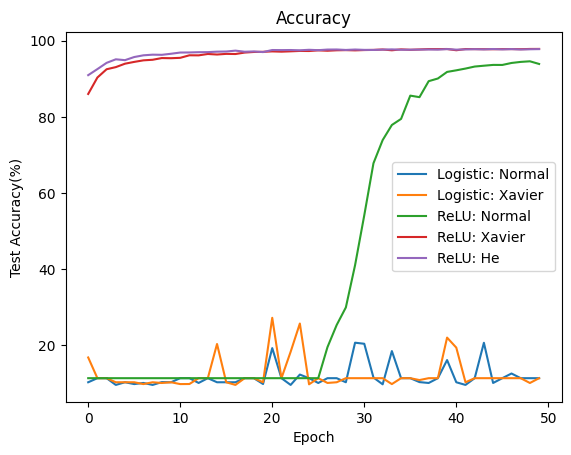

In [68]:
plt.plot([i*100 for i in history_sigmoid_randomnormal_model.history['val_accuracy']], label='Logistic: Normal')
plt.plot([i*100 for i in history_sigmoid_xavier_model.history['val_accuracy']], label='Logistic: Xavier')
plt.plot([i*100 for i in history_relu_randomnormal_model.history['val_accuracy']], label='ReLU: Normal')
plt.plot([i*100 for i in history_relu_xavier_model.history['val_accuracy']], label='ReLU: Xavier')
plt.plot([i*100 for i in history_relu_he_model.history['val_accuracy']], label='ReLU: He')
plt.legend()
plt.title('Accuracy')
plt.ylabel('Test Accuracy(%)')
plt.xlabel('Epoch')